# Q.1.1 Python code

In [18]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tag import pos_tag


text = """
I received my PhD in Information Systems from Massey University in 2005.
Then I was lecturing in Information Systems at Massey University, Palmerston
North, until 2007. From 2008 until 2011, I was Associate Professor at the
School of Information Management at the Victoria University of Wellington.
In 2012, I joined the Department of Computer Science at the University of
Auckland. I was awarded a Doctor of Science degree from the University of
Auckland in 2015.
I received the Chris Wallace Award for outstanding research contributions
to Australia and New Zealand in 2013, awarded by the Computing Research and
Education Association of Australasia (CORE). This is the most prestigious
award for mid-career computer scientists in Australasia. The prize is available
to academics for post-PhD research undertaken in a university or research
institution in Australia or New Zealand. The research must include a notable
breakthrough or contribution of particular significance. At most one award
is made each year.
Currently, I am an editorial board member of the journals Information Systems,
Data and Knowledge Engineering, and Proceedings of the VLDB Endowment. I
am reviewing extensively for other journals and conferences including ACM
SIGMOD, ACM Transactions on Database System, IEEE ICDE, IEEE Transactions
on Knowledge and Data Engineering, VLDB and the VLDB Journal.
"""


words = word_tokenize(text)
pos_tags = pos_tag(words)

# Define lists to store entities and relationships
entities = []
relationships = []

# Categorize words based on their part-of-speech tags
for word, pos in pos_tags:
    if pos.startswith('NN') or pos.startswith('PRP'):
        # NN: noun, PRP: pronoun
        entities.append(word)
    elif pos.startswith('VB'):
        # VB: verb
        relationships.append(word)

# Print the categorized words
print("Entities:")
print(entities)
print("\nRelationships:")
print(relationships)


Entities:
['I', 'my', 'PhD', 'Information', 'Systems', 'Massey', 'University', 'I', 'Information', 'Systems', 'Massey', 'University', 'Palmerston', 'North', 'I', 'Associate', 'Professor', 'School', 'Information', 'Management', 'Victoria', 'University', 'Wellington', 'I', 'Department', 'Computer', 'Science', 'University', 'Auckland', 'I', 'Doctor', 'Science', 'degree', 'University', 'Auckland', 'I', 'Chris', 'Wallace', 'Award', 'research', 'contributions', 'Australia', 'New', 'Zealand', 'Computing', 'Research', 'Education', 'Association', 'Australasia', 'CORE', 'award', 'computer', 'scientists', 'Australasia', 'prize', 'academics', 'research', 'undertaken', 'university', 'research', 'institution', 'Australia', 'New', 'Zealand', 'research', 'breakthrough', 'contribution', 'significance', 'award', 'year', 'Currently', 'I', 'editorial', 'board', 'member', 'journals', 'Information', 'Systems', 'Data', 'Knowledge', 'Engineering', 'Proceedings', 'VLDB', 'Endowment', 'I', 'journals', 'conferen

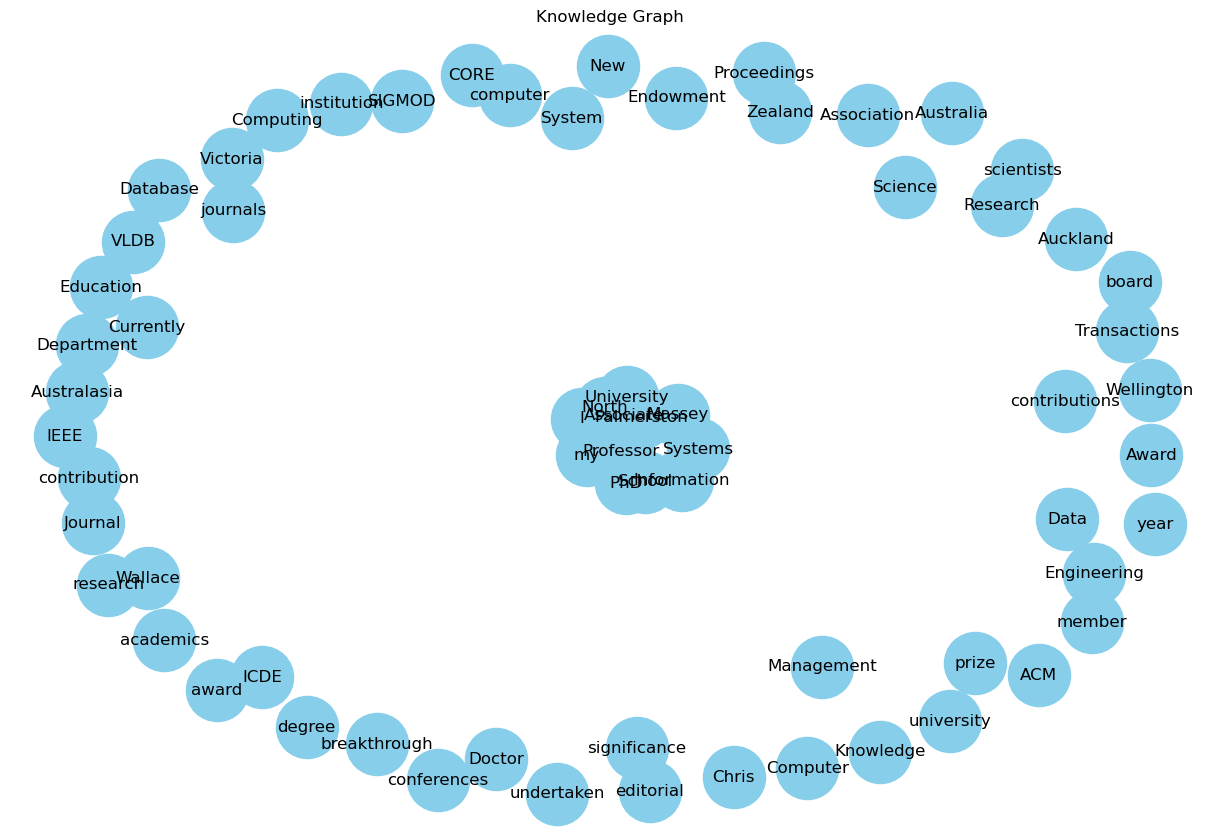

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

text = """
I received my PhD in Information Systems from Massey University in 2005.
Then I was lecturing in Information Systems at Massey University, Palmerston
North, until 2007. From 2008 until 2011, I was Associate Professor at the
School of Information Management at the Victoria University of Wellington.
In 2012, I joined the Department of Computer Science at the University of
Auckland. I was awarded a Doctor of Science degree from the University of
Auckland in 2015.
I received the Chris Wallace Award for outstanding research contributions
to Australia and New Zealand in 2013, awarded by the Computing Research and
Education Association of Australasia (CORE). This is the most prestigious
award for mid-career computer scientists in Australasia. The prize is available
to academics for post-PhD research undertaken in a university or research
institution in Australia or New Zealand. The research must include a notable
breakthrough or contribution of particular significance. At most one award
is made each year.
Currently, I am an editorial board member of the journals Information Systems,
Data and Knowledge Engineering, and Proceedings of the VLDB Endowment. I
am reviewing extensively for other journals and conferences including ACM
SIGMOD, ACM Transactions on Database System, IEEE ICDE, IEEE Transactions
on Knowledge and Data Engineering, VLDB and the VLDB Journal.
"""

# Tokenize the text into words
words = word_tokenize(text)

# Part-of-speech tagging
pos_tags = pos_tag(words)

# Define lists to store entities and relationships
entities = []
relationships = []

# Categorize words based on their part-of-speech tags
for word, pos in pos_tags:
    if pos.startswith('NN') or pos.startswith('PRP'):
        # NN: noun, PRP: pronoun
        entities.append(word)
    elif pos.startswith('VB'):
        # VB: verb
        relationships.append(word)

# Create a directed graph
G = nx.DiGraph()

# Add nodes (entities) to the graph
for entity in entities:
    G.add_node(entity)

# Add edges (relationships) to the graph
for entity, relation in zip(entities[:-1], relationships):
    next_entity_index = entities.index(entity) + 1
    next_entity = entities[next_entity_index]
    G.add_edge(entity, next_entity, label=relation)

# Plot the knowledge graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Positioning nodes using the spring layout algorithm
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', arrowsize=20)

# Add edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Knowledge Graph")
plt.show()


# Q1.2 Python code

In [19]:
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Process the text
doc = nlp(text)

# Initialize lists to store entities and relationships
entities = []
relationships = []

# Extract entities and relationships
for token in doc:
    if token.ent_type_:
        # If the token has an entity type, consider it as an entity
        entities.append(token.text)
    if token.pos_ == "VERB":
        # If the token is a verb, consider it as a relationship
        relationships.append(token.lemma_)

# Print the extracted entities and relationships
print("Entities:")
print(entities)
print("\nRelationships:")
print(relationships)

Entities:
['PhD', 'Information', 'Systems', 'Massey', 'University', '2005', 'Information', 'Systems', 'Massey', 'University', 'Palmerston', 'North', '2007', '2008', '2011', 'the', '\n', 'School', 'of', 'Information', 'Management', 'the', 'Victoria', 'University', 'of', 'Wellington', '2012', 'the', 'Department', 'of', 'Computer', 'Science', 'the', 'University', 'of', '\n', 'Auckland', 'the', 'University', 'of', '\n', 'Auckland', '2015', 'Chris', 'Wallace', 'Award', 'Australia', 'New', 'Zealand', '2013', 'the', 'Computing', 'Research', 'Education', 'Association', 'CORE', 'Australasia', 'Australia', 'New', 'Zealand', 'one', 'each', 'year', 'Information', 'Systems', 'Proceedings', 'of', 'the', 'VLDB', 'Endowment', 'ACM', 'SIGMOD', 'ACM', 'Transactions', 'Database', 'System', 'IEEE', 'Transactions', 'Knowledge', 'and', 'Data', 'Engineering', 'VLDB', 'the', 'VLDB', 'Journal']

Relationships:
['receive', 'lecture', 'join', 'award', 'receive', 'award', 'undertake', 'include', 'make', 'review',

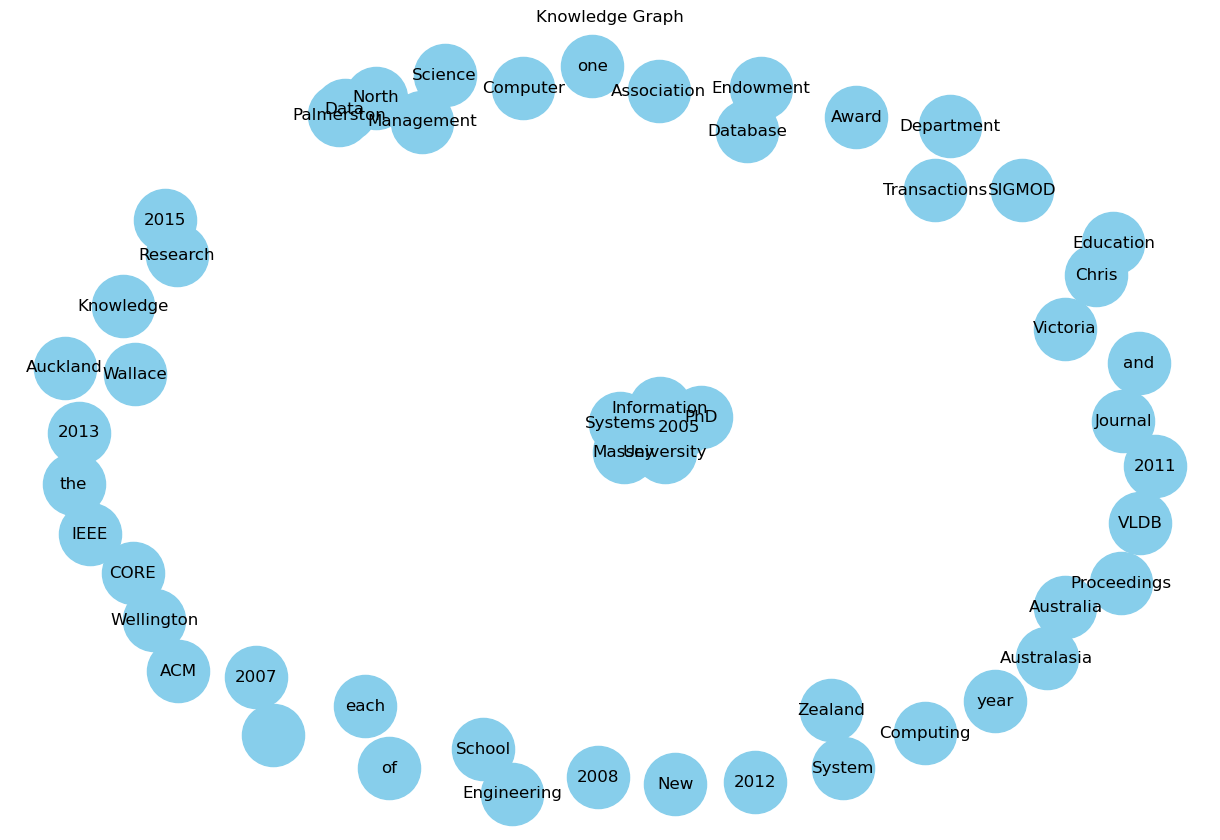

In [6]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Process the text
doc = nlp(text)

# Initialize lists to store entities and relationships
entities = []
relationships = []

# Extract entities and relationships
for token in doc:
    if token.ent_type_:
        # If the token has an entity type, consider it as an entity
        entities.append(token.text)
    if token.pos_ == "VERB":
        # If the token is a verb, consider it as a relationship
        relationships.append(token.lemma_)

# Create a directed graph
G = nx.DiGraph()

# Add nodes (entities) to the graph
for entity in entities:
    G.add_node(entity)

# Add edges (relationships) to the graph
for entity, relation in zip(entities[:-1], relationships):
    next_entity_index = entities.index(entity) + 1
    next_entity = entities[next_entity_index]
    G.add_edge(entity, next_entity, label=relation)

# Plot the knowledge graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Positioning nodes using the spring layout algorithm
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', arrowsize=20)

# Add edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Knowledge Graph")
plt.show()


# Q3.3 Pagerank Python Code

In [20]:
import numpy as np

def pagerank(M, damping_factor= 1 , epsilon=1e-8):
    # Initialize PageRank vector
    n = len(M)
    PR = np.ones(n) / n
    
    # Initialize iteration counter
    iterations = 0
    
    # Power iteration until convergence
    while True:
        new_PR = damping_factor * np.dot(M, PR) + (1 - damping_factor) / n
        
        # Check convergence
        if np.linalg.norm(new_PR - PR) < epsilon:
            break
        
        PR = new_PR
        iterations += 1
    
    return PR, iterations

# Transition matrix for the web graph
M = np.array([
    [0, 0, 0, 1/3, 1],
    [1, 0, 1, 0, 0],
    [0, 1/2, 0, 1/3, 0],
    [0, 1/2, 0, 0, 0],
    [0, 0, 0, 1/3, 0]
])

# Compute PageRank and get the number of iterations
PR, num_iterations = pagerank(M)

print("PageRank scores:", PR)
print("Number of iterations:", num_iterations)


PageRank scores: [0.125  0.375  0.25   0.1875 0.0625]
Number of iterations: 35
